rdkit - Cheminformatics Toolkit,
Chem - A subset of rdkit for molecule manipulation,
IPythonConsole - A subset of rdkit to control image quality,
Draw - A subset of rdkit for structure drawing,
AllChem - A subset of rdkit for optimizing 3D structures

In [1]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole

We are going to select and modify one of the ligands from the list. 
Any of them could be used, but we will be using 13U: N-cyclooctylglycyl-N-(4-carbamimidoylbenzyl)-L-prolinamide.

[05:53:32] Warning: molecule is tagged as 2D, but at least one Z coordinate is not zero. Marking the mol as 3D.


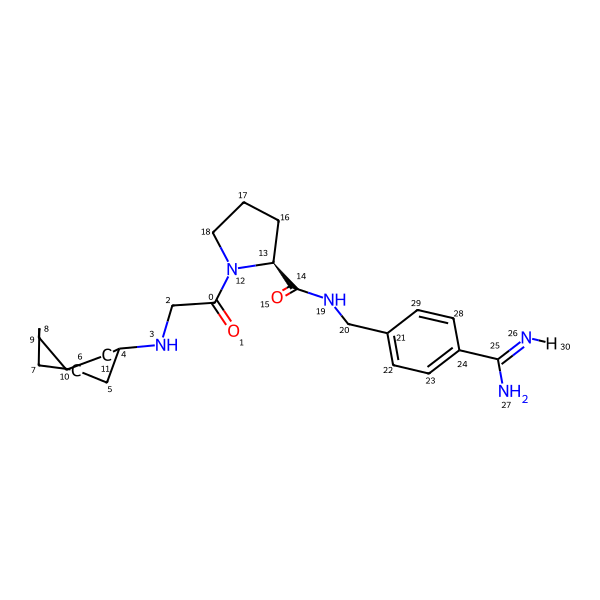

In [2]:
# Configuration for displaying in Jupyter notebooks
IPythonConsole.ipython_useSVG = True    # Use SVG for higher quality images
IPythonConsole.drawOptions.addAtomIndices = True    # Show atom indices
IPythonConsole.molSize = 600, 600     # Set size of image

ligand = Chem.MolFromMolFile("ligands/13U_ideal.sdf")       # by default removeHs = True
ligand

# Modifying a ligand

[05:54:09] Warning: molecule is tagged as 2D, but at least one Z coordinate is not zero. Marking the mol as 3D.


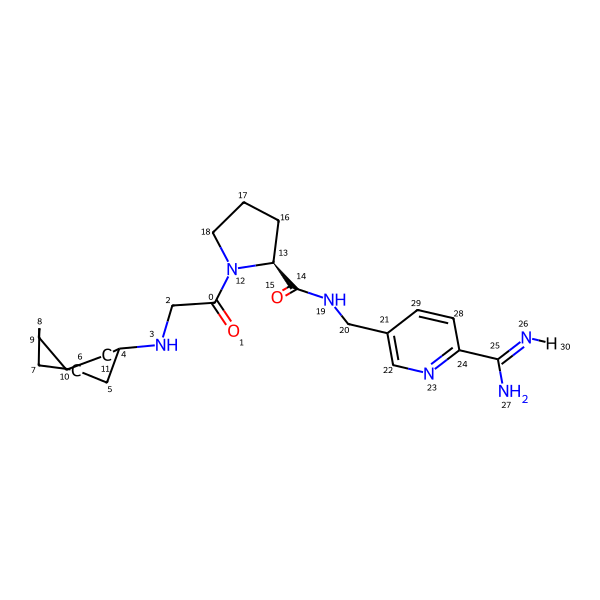

In [4]:
# laod a duplicate copy of 13U to manipulate
mod_ligand_N = Chem.MolFromMolFile("ligands/13U_ideal.sdf")

# change carbon in aromatic ring to a nitrogen
mod_ligand_N.GetAtomWithIdx(23).SetAtomicNum(7)          # change carbon-23 to nitrogen

mod_ligand_N

If we see that the nitrogen we've added has a hydrogen attached to it and disrupts the aromaticity, then
in order to maintain aromaticity, we need to remove this hydrogen. For this run the following code.

atom = mod_ligand_N.GetAtomWithIdx(23) # Select our nitrogen atom
atom.SetNumExplicitHs(0) # Set the number of explicit hydrogens to 0

Look at position 23 now
mod_ligand_N

Create another modified 13U ligand. This time add a methyl group to the ring. 
In this notebook, we're going to be tricky and morph the hydrogen on the carbon atom to a carbon atom. 
However, a more "standard" way to do this would be to create two molecule fragments and then merge them together. 
To be consistent with our above approach, we'll do it the tricky way.

[05:59:23] Warning: molecule is tagged as 2D, but at least one Z coordinate is not zero. Marking the mol as 3D.


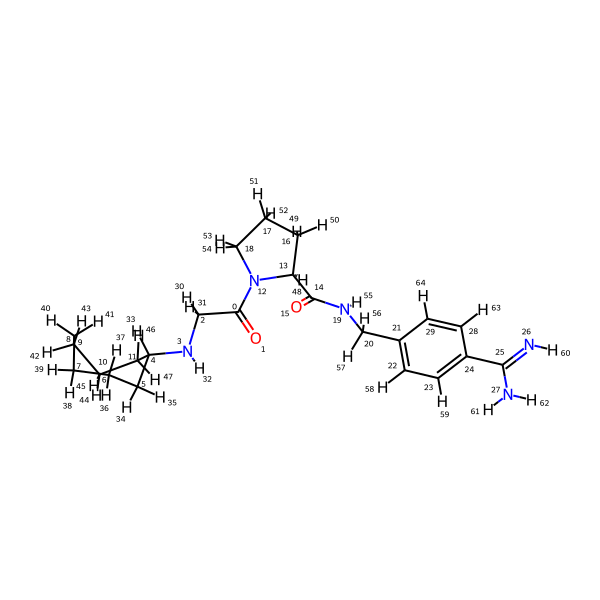

In [5]:
# load another duplicate of the original ligand, but keep the hydrogens

mod_ligand_methyl = Chem.MolFromMolFile("ligands/13U_ideal.sdf", removeHs = False)
mod_ligand_methyl       # This is the original structure. In the cells below, we will convert Hydrogen-59 to a Carbon.

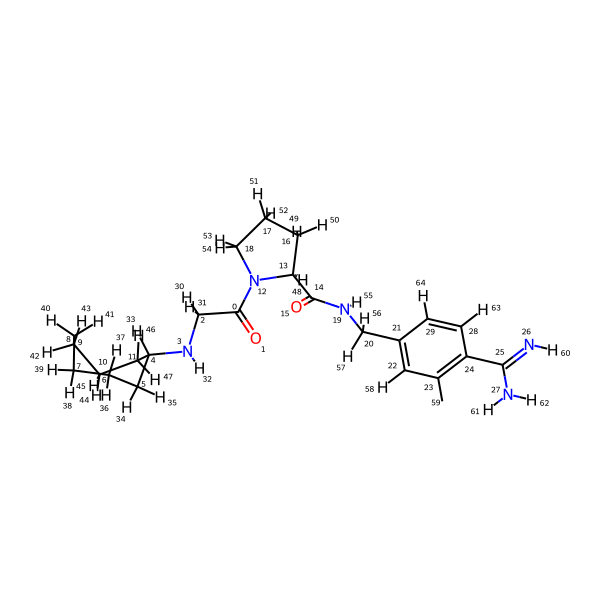

In [6]:
# Use the index number to select the atom we want to change - look at image to see we want to morph atom 59
atom = mod_ligand_methyl.GetAtomWithIdx(59)     ## Select atom Hydrogen-59

atom.SetAtomicNum(6)   # Change the atom to carbon

mod_ligand_methyl      # 3 hydrogens are not added with Carbon-59 yet

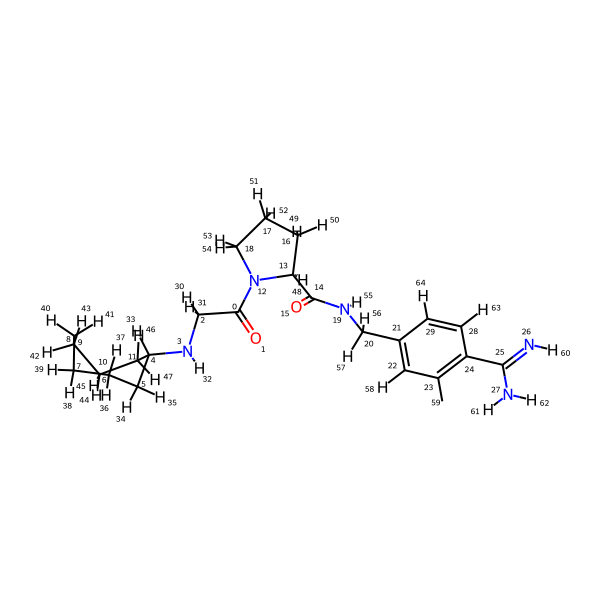

In [7]:
# Use the index number to select the atom we want to change - look at image to see we want to morph atom 59
atom = mod_ligand_methyl.GetAtomWithIdx(59)     ## Select atom Hydrogen-59

atom.SetAtomicNum(6)   # Change the atom to carbon
atom.SetNumExplicitHs(3)   # Add 3 explicit hydrogens to the carbon

mod_ligand_methyl

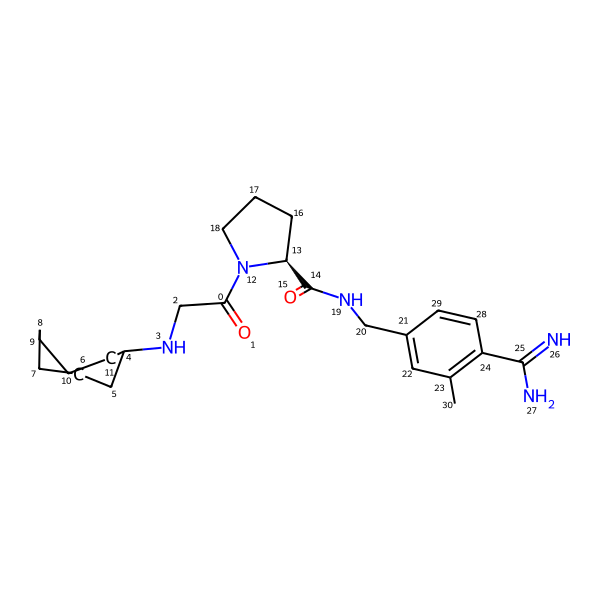

In [8]:
# Use the index number to select the atom we want to change - look at image to see we want to morph atom 59
atom = mod_ligand_methyl.GetAtomWithIdx(59)     ## Select atom Hydrogen-59

atom.SetAtomicNum(6)   # Change the atom to carbon
atom.SetNumExplicitHs(3)   # Add 3 explicit hydrogens to the carbon

mod_ligand_methyl = Chem.RemoveAllHs(mod_ligand_methyl)   # Remove all the H's for viewing
mod_ligand_methyl

Now that we have our manipulated molecules, we'll optimize them using RDKit and save them.

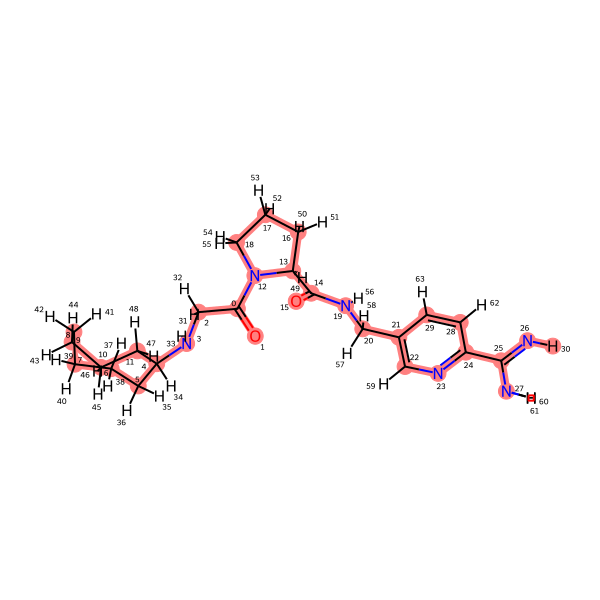

In [11]:
# Optimize new molecules and save
from rdkit.Chem import AllChem

mod_ligand_NH = Chem.AddHs(mod_ligand_N)

# Do a constrained embedding to keep the ligand in the same position
# this allows for the hydrogens to be added in reasonable locations, but keeps
# the heavy atoms in the same position
constrained_mol = AllChem.ConstrainedEmbed(mod_ligand_NH, mod_ligand_N, useTethers = True)
constrained_mol

From higher secondary (HSC) Organic Chemistry, we know that
Kekule was the first to suggest the six membered aromatic ring structure for benzene. 
That's why, it's known as the kekule structure of benzene.
Kekulization means formation of the aromatic benzene ring structure.
"Can't kekulize mol" means the molecule is unable to form the aromatic benzene ring.
"Unkekulized atoms: 21 22 24 28 29" means atoms with index 21, 22, 24, 28, 29 are unable to form kekule structure of benzene.

Bonds can be restored to the aromatic bond type using the rdkit.Chem.rdmolops.SanitizeMol() function.

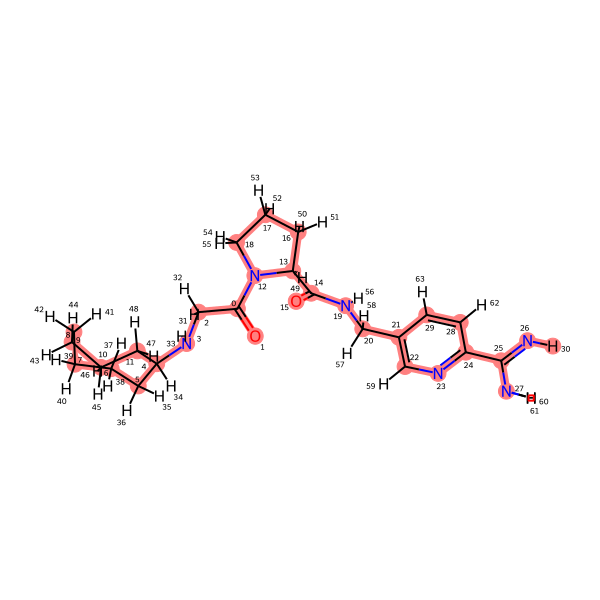

In [18]:
# Optimize new molecules and save
from rdkit.Chem import AllChem

Chem.SanitizeMol(mod_ligand_N)    # to restore the aromatic Kekule structure       
mod_ligand_NH = Chem.AddHs(mod_ligand_N)

# Do a constrained embedding to keep the ligand in the same position
# this allows for the hydrogens to be added in reasonable locations, but keeps
# the heavy atoms in the same position
constrained_mol = AllChem.ConstrainedEmbed(mod_ligand_NH, mod_ligand_N, useTethers = True)
                        # ConstrainedEmbed(what's going to happen, what we were feeding in this process, ...)
constrained_mol

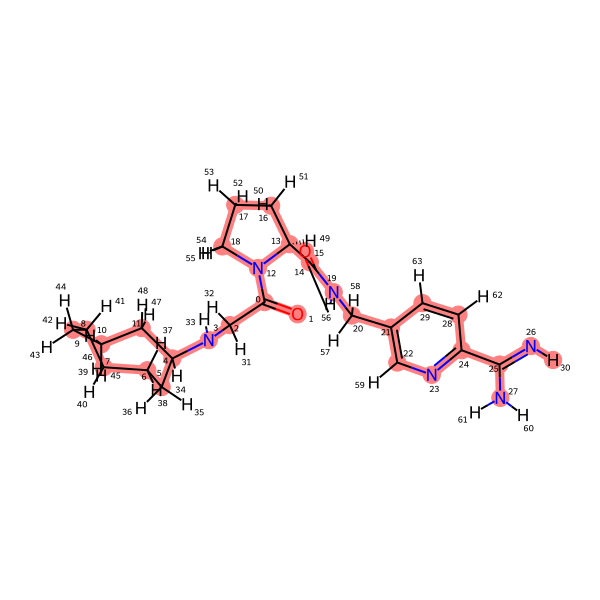

In [19]:
# Perform geometry optimization
opt_N = AllChem.MMFFOptimizeMolecule(mod_ligand_NH)    # MMFF = Merck Molecular Force Field
mod_ligand_NH

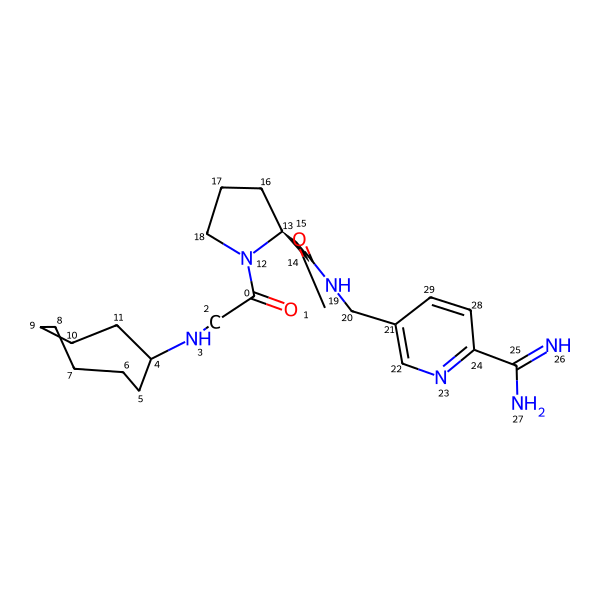

In [20]:
Chem.RemoveAllHs(mod_ligand_NH)

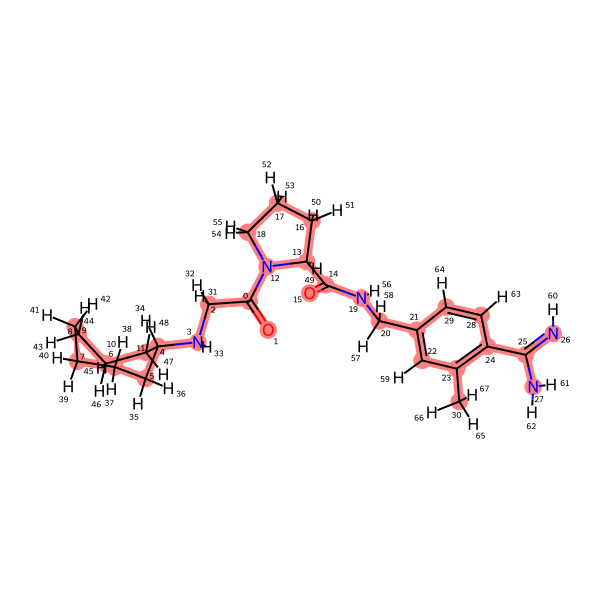

In [21]:
# Repeat process on methyl ligand

Chem.SanitizeMol(mod_ligand_methyl)
mod_ligand_methylH = Chem.AddHs(mod_ligand_methyl)

constrained_mol = AllChem.ConstrainedEmbed(mod_ligand_methylH, mod_ligand_methyl, useTethers = True)
constrained_mol

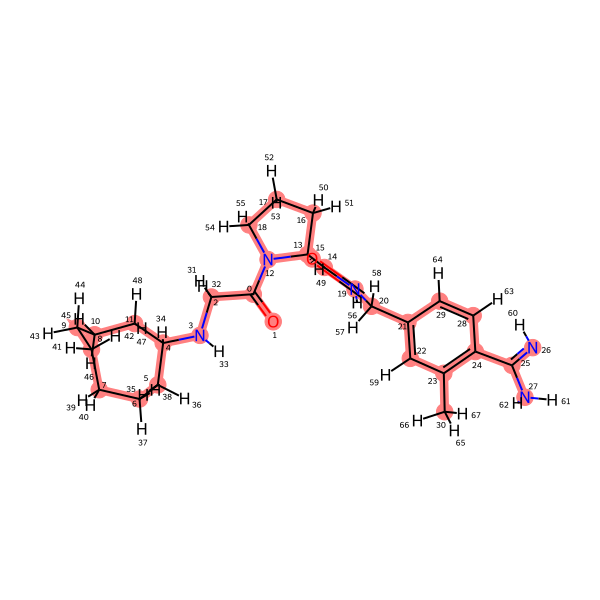

In [22]:
opt_mthyl = AllChem.MMFFOptimizeMolecule(mod_ligand_methylH)
mod_ligand_methylH

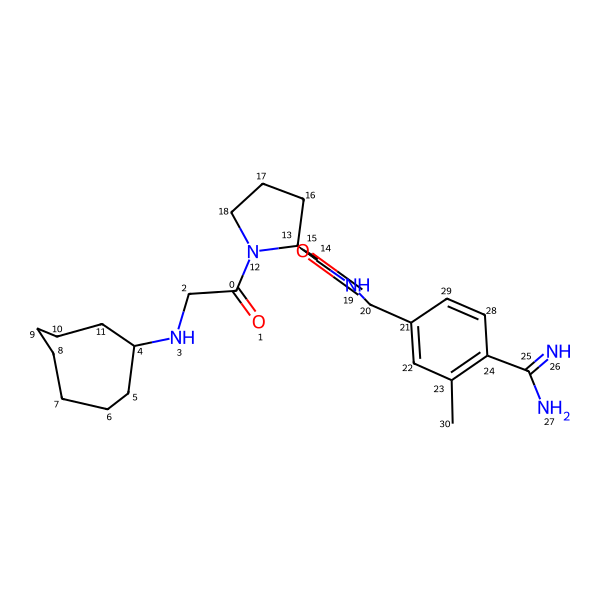

In [23]:
Chem.RemoveAllHs(mod_ligand_methylH)

In [26]:
# save to new files
import os

# make modified ligand directory
os.makedirs("ligands_to_dock", exist_ok = True)

ligand_H = Chem.MolFromMolFile("ligands/13U_ideal.sdf", removeHs = False)    # structure with Hs

# save modified ligands sdf file - make sure all contain hydrogens and place 
# in a folder of ligands to dock.
Chem.MolToMolFile(ligand_H, 'ligands_to_dock/13U.sdf')
Chem.MolToMolFile(mod_ligand_NH, 'ligands_to_dock/13U_modified_N.sdf')
Chem.MolToMolFile(mod_ligand_methylH, 'ligands_to_dock/13U_modified_methyl.sdf')

[06:14:23] Warning: molecule is tagged as 2D, but at least one Z coordinate is not zero. Marking the mol as 3D.
